This is the first Kernel that I have ever published on Kaggle. Took me 3 months of learning to finally pluck up the courage and post my intital work on this reputed site. I really hope the Kernel helps novice Data Scientists/Machine Learning engineers like me understand the basic concepts of Machine Learning. Feedback would be HIGHLY appreciated, and would help me become a better coder :) Thank you for taking the time out in reading this.

I have used the following algortihms and calculated the AUC and accuracy for each of the Supervised learning algos. I am still a noob in the Unsupervised learning section, but I feel I'm making progress! :) 
Supevised Learning - Logistic Regression, Naive Bayes, Decision Trees, Random Forests
Unsupervised Learning - Principal Component Analysis (PCA), KMeans (Flat Clustering), MeanShift (Hierarchical Clustering)

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [4]:
data.shape

(8124, 23)

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#ALl the variables are in string format. Convert categorical variables to integer using label encoder
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [7]:
for col in data.columns:
    data[col]=lbl.fit_transform(data[col])    

In [8]:
#check the data after label encoding
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
#split the x and y variables
y=data['class']
x=data.iloc[:,1:23]

In [10]:
#check shape of new variables
x.shape

(8124, 22)

In [11]:
y.shape

(8124,)

In [12]:
#check data
x.head

<bound method NDFrame.head of       cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0     

In [13]:
y.head

<bound method NDFrame.head of 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32>

In [14]:
#I want to use PCA on this data. First normalise the data using StandardScalar so that the data is now between -1 and 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
#see the Standardised data
print(x)

[[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


In [16]:
#using principal component analysis
#Even though the number of variables is not too high, I would still like to use PCA to see which variables describe the maximum variance in data
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

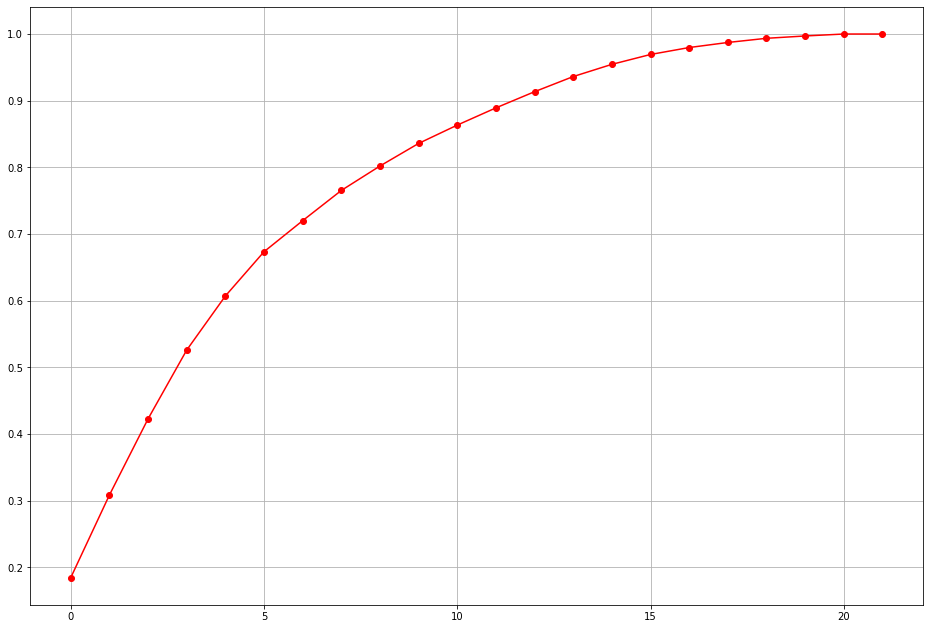

In [17]:
#plot a Scree plot of the Principal Components
plt.figure(figsize=(16,11))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [18]:
#from the graph, first 17 components describe the maximum variance(more than 90% of the data). We shall use them for our subsequent analysis.
new_pca = PCA(n_components=17)

In [19]:
x_new = new_pca.fit_transform(x)

In [20]:
#using KMeans to plot the clusters. We know that we habe 2 classes of the target variable. So n_clusters=2
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)

In [21]:
k_means.fit_predict(x_new )

array([1, 1, 1, ..., 1, 0, 1])

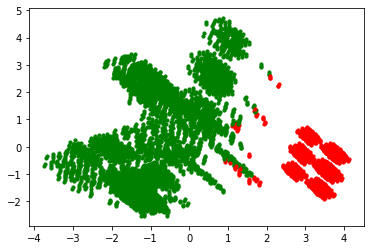

In [22]:
#plot the clusters.
colors = ['r','g']
for i in range(len(x_new)):
    plt.scatter(x_new[i][0], x_new[i][1], c=colors[k_means.labels_[i]], s=10)
plt.show()

In [23]:
#2 distinct clusters are created. Data points are far apart 
x_new.shape

(8124, 17)

In [29]:
#separate the train and test data
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25, random_state = 6)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 17)
(6093,)
(2031, 17)
(2031,)


In [32]:
#using Logistic regression to build the first model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)

In [33]:
lr_predict_prob = lr.predict_proba(x_test)

In [34]:
print(lr_predict)
print(lr_predict_prob[:,1])

[0 1 0 ... 1 0 1]
[0.03604402 0.9481901  0.00154934 ... 0.99951834 0.02289823 0.99985836]


In [35]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

In [37]:
print(lr_conf_matrix)
print(lr_accuracy)

[[1026   34]
 [  83  888]]
0.9423929098966026


In [38]:
#roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,lr_predict_prob[:,1] )

In [39]:
#auc score
from sklearn.metrics import auc
lr_auc = auc(fpr, tpr)
print(lr_auc)

0.9783116025105415


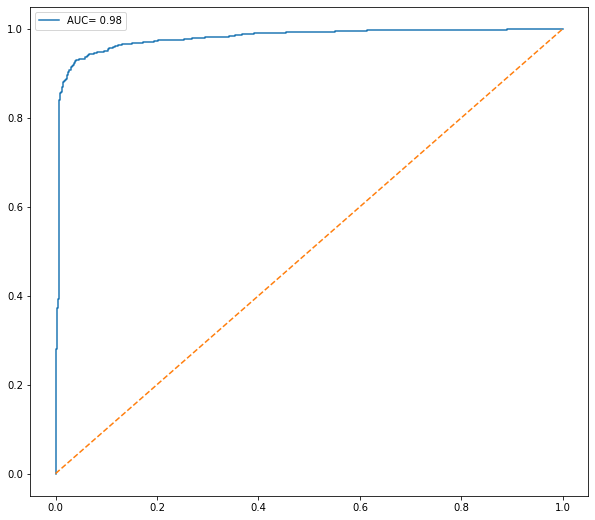

In [40]:
#plotting ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % lr_auc )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [41]:
#Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_predict_prob = gnb.predict_proba(x_test)

In [42]:
print(gnb_predict)
print(gnb_predict_prob)

[0 1 0 ... 1 0 1]
[[7.57456853e-01 2.42543147e-01]
 [2.29901504e-04 9.99770098e-01]
 [9.99999997e-01 3.03339054e-09]
 ...
 [1.42565352e-04 9.99857435e-01]
 [9.98155863e-01 1.84413674e-03]
 [3.27985711e-04 9.99672014e-01]]


In [43]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

In [44]:
print(gnb_conf_matrix)
print(gnb_accuracy_score)

[[1019   41]
 [  92  879]]
0.9345150172328902


In [45]:
#calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, gnb_predict_prob[:,1])
#print auc
gnb_auc = auc(fpr, tpr)
print(gnb_auc)

0.964131511960049


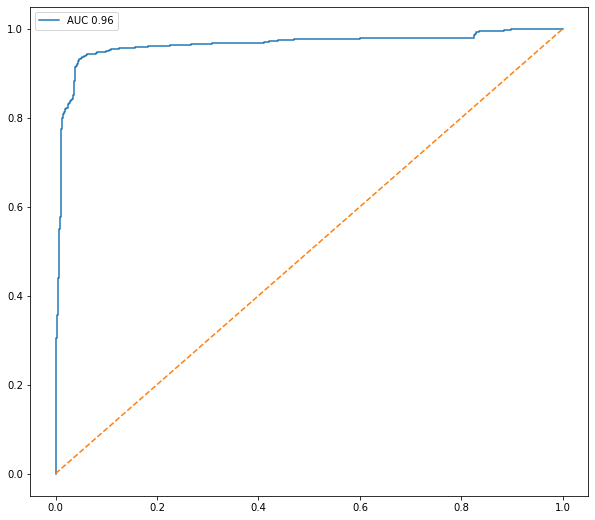

In [46]:
#plot ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % gnb_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [47]:
#lets use Decision Trees to classify 
#use the number of trees as 10 first
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

In [48]:
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)

In [51]:
print(dt_conf_matrix)
print(dt_accuracy_score)

[[1048   12]
 [   5  966]]
0.9916297390448056


In [52]:
#calculate auc and plot roc
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dt_predict_prob[:,1])
dt_auc = auc(fpr, tpr)
print(dt_auc)

0.9943935448769017


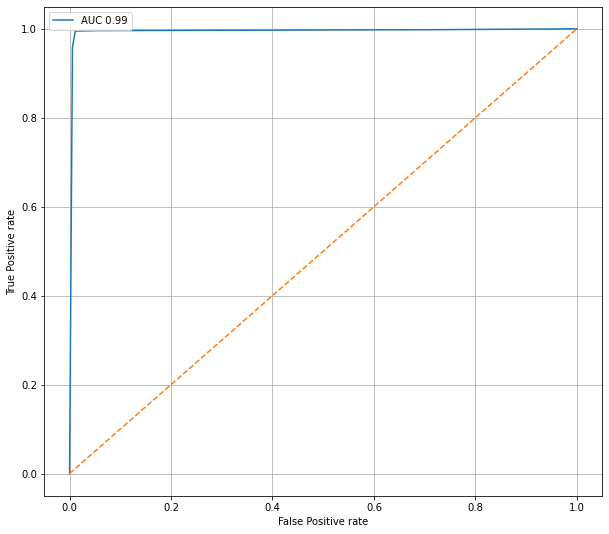

In [53]:
#plot ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % dt_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()


In [54]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)

In [55]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)

In [56]:
print(rf_conf_matrix)
print(rf_accuracy_score)
#random forest has a higher accuracy score than the decision tree
#Decision tree = 99.3
#Random forest = 99.9

[[1060    0]
 [   0  971]]
1.0


In [57]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predict_prob[:,1])
rf_auc = auc(fpr, tpr)
print(rf_auc)

1.0


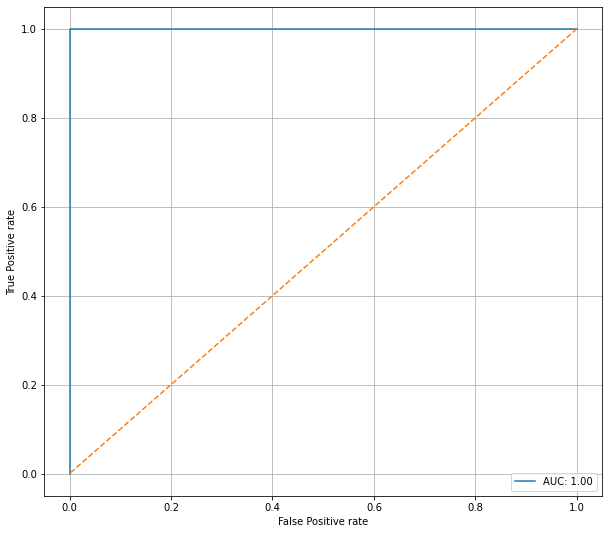

In [58]:
#plot the ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid()

In [59]:
#how would an unsupervised algo like MeanShift or DBScan work? Let's find out
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(x_new)

MeanShift()

In [60]:
#print the labels and the cluster centers (I will be calling them centroids)
ms_labels = ms.labels_
ms_centroids = ms.cluster_centers_
print(ms_labels)
print(ms_centroids)

[0 0 0 ... 1 0 1]
[[ 8.36179992e-03 -2.17301777e-02 -1.05551283e-02 -3.17219440e-01
  -2.18361308e-02 -9.34208201e-02 -5.54691447e-04 -5.00204579e-02
   1.49697617e-02 -1.65030838e-02 -3.10626417e-03  1.29905637e-02
  -2.27703383e-03  1.68147423e-02 -1.94916186e-02  1.77512799e-02
  -6.61565076e-04]
 [-1.39533915e+00 -1.55830213e+00  3.44201193e+00  7.33900470e+00
   2.95866272e+00 -1.61765662e+00  2.12442296e-01 -1.18676486e-01
   1.79871844e-01 -5.71849692e-01 -1.04210679e-01  1.72975850e-02
   6.72168923e-02 -1.34458173e-01 -1.12693818e-01  2.02568504e-01
  -1.06860187e-02]
 [-1.52002054e+00  1.66258498e-01  2.60843916e+00  1.50630708e+00
   1.98031603e+00 -1.67510137e+00 -5.56169679e-01  1.75054179e+00
  -1.59271498e+00  3.97565610e+00  1.89010801e+00  3.49427797e-02
  -2.62702056e-01  6.97188441e-01  1.80195722e+00 -1.61784722e+00
   4.32329537e-01]]


In [61]:
#np.unique will give us one count of each label. 
n_clusters = len(np.unique(ms_labels))
print(n_clusters)

3


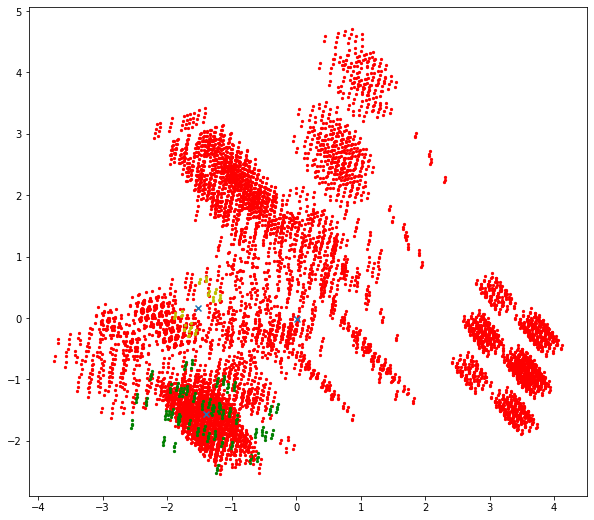

In [62]:
#let's plot the clusters and see how different they are from our original cluster of KMeans'
plt.figure(figsize=(10,9))
colors = ['r','g','y','b']
for i in range(len(x_new)):
    plt.scatter(x_new[i][0], x_new[i][1], c=colors[ms_labels[i]], s=5)
#print cluster centers
#Cluster centers are x's in blue
plt.scatter(ms_centroids[:,0], ms_centroids[:,1], marker='x')
plt.show()
#Considerably different!